## Business Problem

### Description

Text documents are one of the richest sources of data for businesses: whether in the shape of customer support tickets, emails, technical documents, user reviews or news articles, they all contain valuable information that can be used to automate slow manual processes, better understand users, or find valuable insights. However, traditional algorithms struggle at processing these unstructured documents, and this is where machine learning comes to the rescue!

We’ll use a public dataset from the BBC comprised of 2225 articles, each labeled under one of 5 categories.

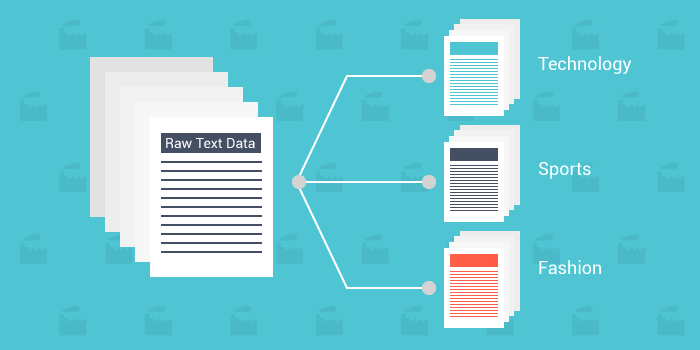

###### Problem Statement

- We are tasked with predicting the category of a news article using machine learning models.
- This could be useful to instantly predict category of an article ,for which it is not mentioned.
  Helpful in reducing manual task.

### Sources or Useful Links

- Source1: http://mlg.ucd.ie/datasets/bbc.html - Train and Validation data set.
- Source2: https://inshorts.com/ - Evaluation data set.(Collected through WebScrapping)

### Real World/Business objectives and Constraints

- Cost of misclassification can be high.
- Interpretability is partially important

## Machine Learning Problem

### Data Overview

- Consists of 2225 documents from the BBC news website corresponding to stories in five topical areas from 2004-2005.
- Class Labels: 5 (business, entertainment, politics, sport, tech).
- Size of bbc file:4.80MB.
- Scrapped data from https://inshorts.com/ for evaluation dataset.
- inshorts dataset contains 25 articles of 5 (business, entertainment, politics, sport, tech).

#### Example Data point

Ad sales boost Time Warner profit

Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.

The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.

Time Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sign up AOL's existing customers for high-speed broadband. TimeWarner also has to restate 2000 and 2003 results following a probe by the US Securities Exchange Commission (SEC), which is close to concluding.

Time Warner's fourth quarter profits were slightly better than analysts' expectations. But its film division saw profits slump 27% to $284m, helped by box-office flops Alexander and Catwoman, a sharp contrast to year-earlier, when the third and final film in the Lord of the Rings trilogy boosted results. For the full-year, TimeWarner posted a profit of $3.36bn, up 27% from its 2003 performance, while revenues grew 6.4% to $42.09bn. "Our financial performance was strong, meeting or exceeding all of our full-year objectives and greatly enhancing our flexibility," chairman and chief executive Richard Parsons said. For 2005, TimeWarner is projecting operating earnings growth of around 5%, and also expects higher revenue and wider profit margins.

TimeWarner is to restate its accounts as part of efforts to resolve an inquiry into AOL by US market regulators. It has already offered to pay $300m to settle charges, in a deal that is under review by the SEC. The company said it was unable to estimate the amount it needed to set aside for legal reserves, which it previously set at $500m. It intends to adjust the way it accounts for a deal with German music publisher Bertelsmann's purchase of a stake in AOL Europe, which it had reported as advertising revenue. It will now book the sale of its stake in AOL Europe as a loss on the value of that stake.


### Mapping Real World problem to Machine Learning problem

- Multiclass classification problem.For a given article we need to predict its caetgory among five classes.
- Train the model on BBC data.The model should be able to categorize article from any news source.

### Metrics

- Multiclass Confusion matrix- Macro avg F1score.
- Macro avg F1score=2*Pr_macro⋅Re_macro/(Pr_macro+Re_macro)
- If F1macro has a large value, this indicates that a classifier performs well for each individual class. 
  The macro-average is therefore more suitable for data with an imbalanced class distribution.

### Train Test Preparation

####  Import Packages

In [1]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

#### Load Data

In [ ]:
bbc=r"C:\Users\DELL\Desktop\A6\news_classification\bbc"
categories=os.listdir(bbc)
categories

In [3]:
categories.remove(categories[3])
categories

['business', 'entertainment', 'politics', 'sport', 'tech']

In [4]:
data=[]
for cat in categories:
    for file in glob.glob(r"C:\Users\DELL\Desktop\A6\news_classification\bbc\\"+cat+"\\*.TXT"):
        f=open(file)
        content=f.read()
        filename=file.split("\\")[-1]
        id=cat+filename.split('.')[0]
        data.append([cat,id,content])        

**Observations:**

- There are news articles from 4differrent categories in data set.
- Categories are business,entertainment,politics,sport,tech.

##### Base Data Creation

In [5]:
data_array=np.array(data)
bbc_data=pd.DataFrame(data_array)
bbc_data.head()

,0,1,2
0,business,business001,Ad sales boost Time Warner profit\n\nQuarterly...
1,business,business002,Dollar gains on Greenspan speech\n\nThe dollar...
2,business,business003,Yukos unit buyer faces loan claim\n\nThe owner...
3,business,business004,High fuel prices hit BA's profits\n\nBritish A...
4,business,business005,Pernod takeover talk lifts Domecq\n\nShares in...


#### Renaming Features and Target

In [6]:
bbc_data.rename({0:'category',1:'id',2:'content'},axis=1,inplace=True)
bbc_data.head(3)

,category,id,content
0,business,business001,Ad sales boost Time Warner profit\n\nQuarterly...
1,business,business002,Dollar gains on Greenspan speech\n\nThe dollar...
2,business,business003,Yukos unit buyer faces loan claim\n\nThe owner...


##### Labelling categorical values

In [7]:
bbc_data['category_id']=bbc_data['category'].factorize()[0]
bbc_data.head(3)

,category,id,content,category_id
0,business,business001,Ad sales boost Time Warner profit\n\nQuarterly...,0
1,business,business002,Dollar gains on Greenspan speech\n\nThe dollar...,0
2,business,business003,Yukos unit buyer faces loan claim\n\nThe owner...,0


**Observations:**

- Created a base data,where category,id,content & category_id are features.

#### Basic Statistics

##### Shape & Info

In [8]:
print(f"Number of rows in DataFrame:{bbc_data.shape[0]},Number of Features:{bbc_data.shape[1]}")

Number of rows in DataFrame:2225,Number of Features:4


In [9]:
bbc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 4 columns):
category       2225 non-null object
id             2225 non-null object
content        2225 non-null object
category_id    2225 non-null int64
dtypes: int64(1), object(3)
memory usage: 69.6+ KB


#### Null Value treatment

In [10]:
bbc_data.isna().sum()

category       0
id             0
content        0
category_id    0
dtype: int64

- There are no rows or columns with null values/missing values.

#### Glimpse of the document

In [11]:
import random
num = 3
sample = random.sample(range(bbc_data.content.shape[0]), num)

for idx in sample:
    print('*'*30)
    values = bbc_data.iloc[idx]
    print('Document ID : ', values['id'])
    print('Category : ', values['category'])
    print('Content : \n'+'-'*7)
    print(values['content'])
    print('='*36)

******************************
Document ID :  sport419
Category :  sport
Content : 
-------
Tindall aiming to earn Lions spot

Bath and England centre Mike Tindall believes he can make this summer's Lions tour, despite missing most of the season through injury.

The World Cup winner has been out of action since December, having damaged both his shoulder and his foot. But Tindall, who recently signed for Bath's west-country rivals Gloucester, told Rugby Special he would be fit in time for the tour to New Zealand. "I'm aiming to be fit by 18 April and hope I can play from then," he said. "I've spoken to Sir Clive Woodward and he understands the situation, so I just hope that I can get on the tour." The 26-year-old will face stiff competition for those centre places from Brian O'Driscoll, Gordon D'Arcy and Gavin Henson, and is aware that competition is intense.

But after missing out on the 2001 tour to Australia with a knee injury, Tindall says he will be happy just to have an opportunit

**Observations:**

- Each Document starts with a headline.
- The headline can be extracted and use as an additional feature.

#### Basic Feature Extraction

- Extracting first line of each article,and adding a new feature title.

##### Extracting title

In [12]:
text = bbc_data["content"].str.split("\n", n = 1, expand = True) 

bbc_data["title"] =  text[0]
bbc_data['content'] = text[1]

In [13]:
type(text)

pandas.core.frame.DataFrame

In [14]:
bbc_data.head(2)

,category,id,content,category_id,title
0,business,business001,\nQuarterly profits at US media giant TimeWarn...,0,Ad sales boost Time Warner profit
1,business,business002,\nThe dollar has hit its highest level against...,0,Dollar gains on Greenspan speech


In [15]:
print("="*110)
print(f"Title:{bbc_data.iloc[5]['title']}")
print("-"*110)
print(bbc_data.iloc[5]['content'])
print("="*110)

Title:Japan narrowly escapes recession
--------------------------------------------------------------------------------------------------------------

Japan's economy teetered on the brink of a technical recession in the three months to September, figures show.

Revised figures indicated growth of just 0.1% - and a similar-sized contraction in the previous quarter. On an annual basis, the data suggests annual growth of just 0.2%, suggesting a much more hesitant recovery than had previously been thought. A common technical definition of a recession is two successive quarters of negative growth.

The government was keen to play down the worrying implications of the data. "I maintain the view that Japan's economy remains in a minor adjustment phase in an upward climb, and we will monitor developments carefully," said economy minister Heizo Takenaka. But in the face of the strengthening yen making exports less competitive and indications of weakening economic conditions ahead, observers we

#### Basic EDA

##### Distribution of target variable-categories

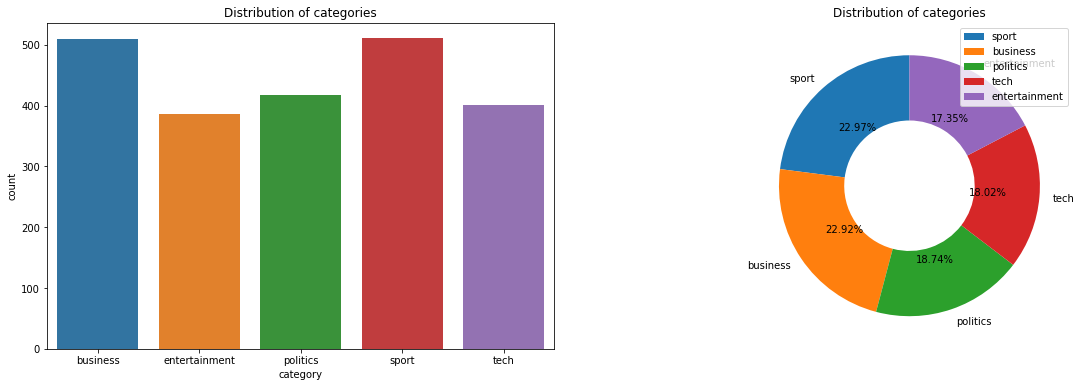

In [16]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.countplot(x='category',data=bbc_data)
plt.title('Distribution of categories')

plt.subplot(1,2,2)
sizes=[x for x in bbc_data['category'].value_counts()]
status=bbc_data['category'].value_counts().index
plt.pie(sizes,labels=status,wedgeprops=dict(width=0.5),startangle=90,autopct='%1.2f%%')
plt.legend()
plt.title('Distribution of categories')
plt.show()

In [17]:
bbc_data['category'].value_counts()


sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

**Observations:**

- Contribution of entertainment to the data set is less compared to other categories.
- Differrence between classes with highest contribution and lowest contribution is not more than 5%.

#### title

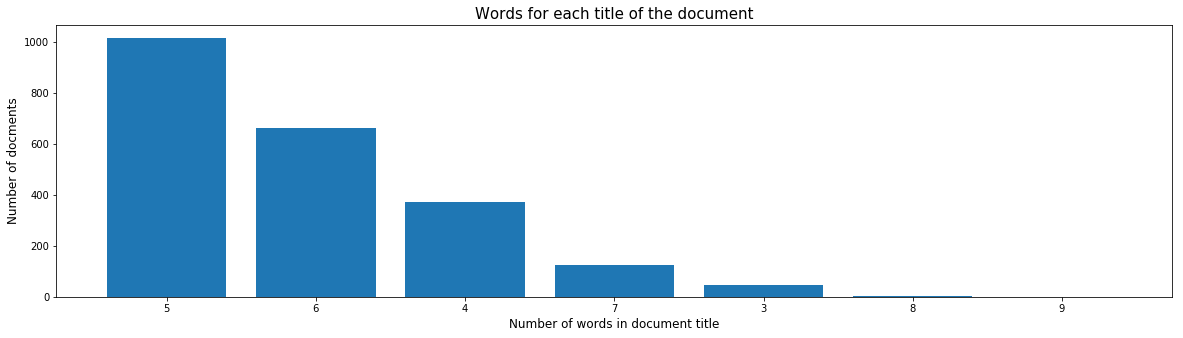

In [18]:
# Calculate number of words in a string in DataFrame" - https://stackoverflow.com/a/37483537/4084039

word_dict = dict(bbc_data['title'].str.split().apply(len).value_counts())

idx = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(idx, list(word_dict.values()))

plt.ylabel('Number of docments',fontsize=12)
plt.xlabel('Number of words in document title',fontsize=12)
plt.title('Words for each title of the document',fontsize=15)
plt.xticks(idx, list(word_dict.keys()))
plt.show()

- Majority of the articles are having 4-6 words in title.
- There are very few articles with more than 7 words per title.
- Reporters/Editors prefer to give scrip and meaningful headlines to articles.

#### Boxplot to check words in document title

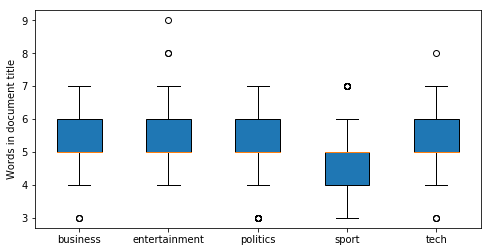

In [19]:
from collections import defaultdict
frame = defaultdict(list)
cat_titles_word_count = defaultdict(list)
for cat in bbc_data.category.unique():
    val = bbc_data[bbc_data['category']==cat]['title'].str.split().apply(len).values
    cat_titles_word_count[cat]=val
# distribution of titles across categories
plt.figure(figsize=(8,4))
plt.boxplot(cat_titles_word_count.values(),patch_artist=True)
keys = cat_titles_word_count.keys()
plt.xticks([i+1 for i in range(len(keys))], keys)
plt.ylabel('Words in document title')
#plt.grid()
plt.show()

- All category have title words ranging between 4-7,except sport.

#### Text Preprocessing

In [20]:
#Creating a stopword list
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't","january","february","march","april","may","june","july","august","septemer",\
             "october","november","december","today","tomorrow","yesterday"]

In [21]:
import re
import unicodedata

def clean_text(text):
    #Treat accented characters
    text=unicodedata.normalize('NFKD',text).encode('ascii','ignore').decode('utf-8','ignore')    
    
    # Decontracting Words
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text=re.sub(r"They'd", "they would", text)
    text=re.sub(r"don't", "do not", text)
    
    #remove html tags
    pattern=re.compile(r'<.*?>')
    text=re.sub(pattern,' ',text)
    pattern=re.compile(r'http\?s\S+')
    text=re.sub(pattern,' ',text)
    
    # remove Special characters
    text = re.sub('[^A-Za-z0-9]+', ' ', text)
    text = text.lower()

    # remove line breaks \r \n \t remove from string 
    text = text.replace('\\r', ' ')
    text = text.replace('\\"', ' ')
    text = text.replace('\\t', ' ')
    text = text.replace('\\n', ' ')

    # remove stopwords
    text = ' '.join(word.lower() for word in text.split() if word not in stopwords)

    return text

##### title

- Normalizing text data by removing html&URL tags followed by decontracting words and removing stopwords.

In [22]:
from tqdm import tqdm
clean_titles = []
for title in tqdm(bbc_data['title'].values):
    clean_title = clean_text(title)
    clean_titles.append(clean_title)
bbc_data['title']=clean_titles

100%|███████████████████████████████████| 2225/2225 [00:00<00:00, 13724.66it/s]


##### content

In [23]:
from tqdm import tqdm
clean_contents = []
for content in tqdm(bbc_data['content'].values):
    clean_content = clean_text(content)
    clean_contents.append(clean_content)
bbc_data['content']=clean_contents

100%|█████████████████████████████████████| 2225/2225 [00:04<00:00, 501.90it/s]


In [24]:
bbc_data.head(3)

,category,id,content,category_id,title
0,business,business001,quarterly profits us media giant timewarner ju...,0,ad sales boost time warner profit
1,business,business002,dollar hit highest level euro almost three mon...,0,dollar gains greenspan speech
2,business,business003,owners embattled russian oil giant yukos ask b...,0,yukos unit buyer faces loan claim


#### Traget-Features Split

- Splitting dataset into dependable and independable variables.

In [25]:
X=bbc_data.iloc[:,bbc_data.columns!='category_id']
X.drop(['id','category'],axis=1,inplace=True)
Y=bbc_data['category_id']

In [26]:
X.head(2)

,content,title
0,quarterly profits us media giant timewarner ju...,ad sales boost time warner profit
1,dollar hit highest level euro almost three mon...,dollar gains greenspan speech


In [27]:
Y.head(3)

0    0
1    0
2    0
Name: category_id, dtype: int64

#### Train-Test Split

- Splitting dataset into train and validation data sets.

In [28]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.30,stratify=Y)
print('Train data')
print(f"xtrain:{xtrain.shape},ytrain:{ytrain.shape}")
print("-----------------------------------------------")
print('Test data')
print(f"xtest:{xtest.shape},ytest:{ytest.shape}")

Train data
xtrain:(1557, 2),ytrain:(1557,)
-----------------------------------------------
Test data
xtest:(668, 2),ytest:(668,)


### Vectorization

- Vectorizing text features.

#### title

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(ngram_range=(1,2),min_df=3)
tf.fit(xtrain['title'].values)
title_trtf=tf.transform(xtrain['title'].values)
title_tetf=tf.transform(xtest['title'].values)
print("Data after vectorization")
print(f"Train data-:{title_trtf.shape}")
print(f"Test data-:{title_tetf.shape}")

Data after vectorization
Train data-:(1557, 722)
Test data-:(668, 722)


#### content

In [30]:
tf=TfidfVectorizer(ngram_range=(1,2),min_df=5)
tf.fit(xtrain['content'].values)
content_trtf=tf.transform(xtrain['content'].values)
content_tetf=tf.transform(xtest['content'].values)
print("Data after vectorization")
print(f"Train data-:{content_trtf.shape}")
print(f"Test data-:{content_tetf.shape}")

Data after vectorization
Train data-:(1557, 11359)
Test data-:(668, 11359)


In [31]:
xtrain.head(3)

,content,title
428,us trade deficit widened expected hitting reco...,us trade gap ballooned
1401,greek sprinter katerina thanou says eager comp...,thanou desperate make return
736,george michael perform live london abbey road ...,george michael perform bbc


### Preparing Data Matrix

In [32]:
from scipy.sparse import  hstack

train=hstack((title_trtf,content_trtf)).tocsr()
test=hstack((title_tetf,content_tetf)).tocsr()
print("Data")
print(f"Train data features-:{train.shape},Train data target-:{ytrain.shape}")
print(f"Test data features-:{test.shape},Test data target-:{ytest.shape}")

Data
Train data features-:(1557, 12081),Train data target-:(1557,)
Test data features-:(668, 12081),Test data target-:(668,)


### Base Model

In [33]:
def conf_mat(data,ytrain, ytrain_pred,ytest, ytest_pred):
    from sklearn.metrics import confusion_matrix

    category_id_df = data[['category', 'category_id']].drop_duplicates().sort_values('category_id')
    sns.set(font_scale=1.5)
    plt.figure(figsize=(22,5))
    plt.subplot(1,2,1)
    conf_mat = confusion_matrix(ytrain, ytrain_pred)
    sns.heatmap(conf_mat, annot=True, fmt='d',
                xticklabels=category_id_df.category.values, yticklabels=category_id_df.category.values)
    plt.title('Train')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

    plt.subplot(1,2,2)
    conf_mat = confusion_matrix(ytest, ytest_pred)
    sns.heatmap(conf_mat, annot=True, fmt='d',
                xticklabels=category_id_df.category.values, yticklabels=category_id_df.category.values)
    plt.title('Test')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

#### Logistic Regression

In [34]:
bbc_data.groupby(['category','category_id']).size()

category       category_id
business       0              510
entertainment  1              386
politics       2              417
sport          3              511
tech           4              401
dtype: int64

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report,confusion_matrix

lgr=LogisticRegression()
ovr=OneVsRestClassifier(lgr)
ovr.fit(train,ytrain)
ytrain_pred=ovr.predict(train)
ytest_pred=ovr.predict(test)
print('business:0,entertainment:1,politics:2,sport:3,tech:4')
print('-------------------------------------------------------------------------')
print('Train report')
print(classification_report(ytrain,ytrain_pred))
print("-------------------------------------------------------------------------")
print('Test report')
print(classification_report(ytest,ytest_pred))

business:0,entertainment:1,politics:2,sport:3,tech:4
-------------------------------------------------------------------------
Train report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       357
           1       1.00      1.00      1.00       270
           2       0.99      1.00      1.00       292
           3       1.00      1.00      1.00       357
           4       1.00      0.99      0.99       281

    accuracy                           1.00      1557
   macro avg       1.00      1.00      1.00      1557
weighted avg       1.00      1.00      1.00      1557

-------------------------------------------------------------------------
Test report
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       153
           1       0.97      0.93      0.95       116
           2       0.95      0.99      0.97       125
           3       0.97      1.00      0.99       154
           4  

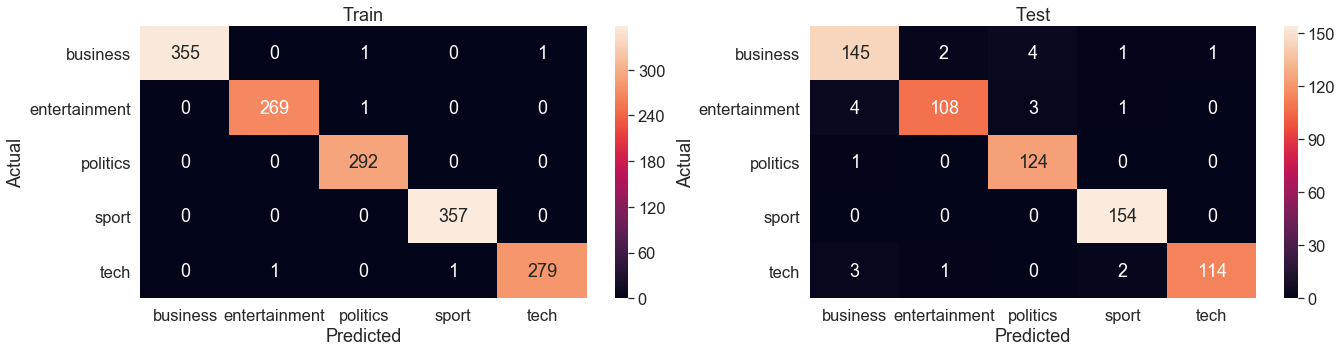

In [36]:
conf_mat(bbc_data,ytrain, ytrain_pred,ytest, ytest_pred)

**Observations:**

- The model provides 100% F1 score and accuraccy on train data,while 97% F1 score and accuraccy on test/validation data.
- Eventhough the model is showing signs of overfit with 100% accuraccy on train data,it is providing good performance on tets data as well.

#### SVM

In [37]:
from sklearn.svm import LinearSVC
sm=LinearSVC(loss='squared_hinge')
ovr_svm=OneVsRestClassifier(sm)
ovr_svm.fit(train,ytrain)
ytrain_pred=ovr_svm.predict(train)
ytest_pred=ovr_svm.predict(test)
print('business:0,entertainment:1,politics:2,sport:3,tech:4')
print('-------------------------------------------------------------------------')
print('Train report')
print(classification_report(ytrain,ytrain_pred))
print("-------------------------------------------------------------------------")
print('Test report')
print(classification_report(ytest,ytest_pred))

business:0,entertainment:1,politics:2,sport:3,tech:4
-------------------------------------------------------------------------
Train report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       357
           1       1.00      1.00      1.00       270
           2       1.00      1.00      1.00       292
           3       1.00      1.00      1.00       357
           4       1.00      1.00      1.00       281

    accuracy                           1.00      1557
   macro avg       1.00      1.00      1.00      1557
weighted avg       1.00      1.00      1.00      1557

-------------------------------------------------------------------------
Test report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       153
           1       0.97      0.95      0.96       116
           2       0.98      0.99      0.99       125
           3       0.99      1.00      0.99       154
           4  

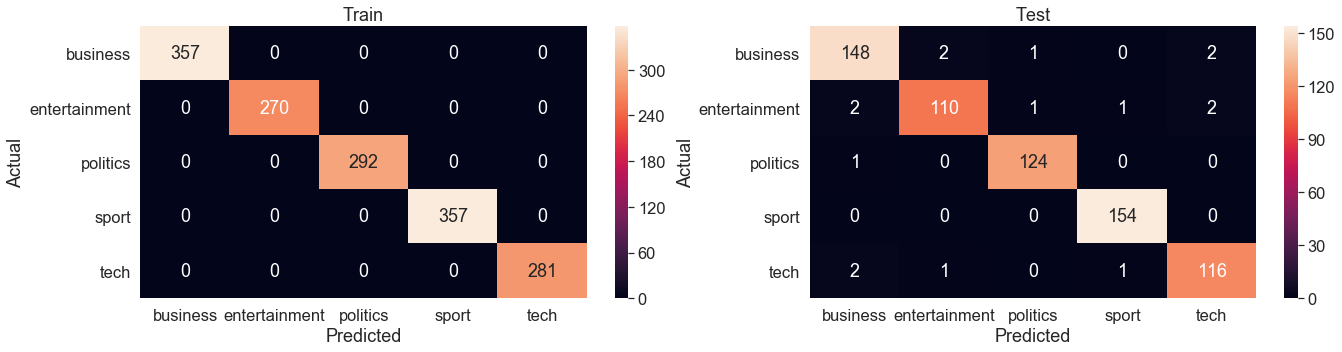

In [38]:
conf_mat(bbc_data,ytrain, ytrain_pred,ytest, ytest_pred)

**Observations:**

- The model provides 100% F1 score and accuraccy on train data,while 98% F1 score and accuraccy on test/validation data.
- Eventhough the model is showing signs of overfit with 100% accuraccy on train data,it is providing good performance on test data as well.
- High precision and recall suggest that the model is capable of generalizing validation dataset.

#### Random Forest classification

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
ovr_rf=OneVsRestClassifier(rf)
ovr_rf.fit(train,ytrain)
ytrain_pred=ovr_rf.predict(train)
ytest_pred=ovr_rf.predict(test)
print('business:0,entertainment:1,politics:2,sport:3,tech:4')
print('-------------------------------------------------------------------------')
print('Train report')
print(classification_report(ytrain,ytrain_pred))
print("-------------------------------------------------------------------------")
print('Test report')
print(classification_report(ytest,ytest_pred))

business:0,entertainment:1,politics:2,sport:3,tech:4
-------------------------------------------------------------------------
Train report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       357
           1       1.00      1.00      1.00       270
           2       1.00      1.00      1.00       292
           3       1.00      1.00      1.00       357
           4       1.00      1.00      1.00       281

    accuracy                           1.00      1557
   macro avg       1.00      1.00      1.00      1557
weighted avg       1.00      1.00      1.00      1557

-------------------------------------------------------------------------
Test report
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       153
           1       0.98      0.97      0.97       116
           2       0.98      1.00      0.99       125
           3       0.98      1.00      0.99       154
           4  

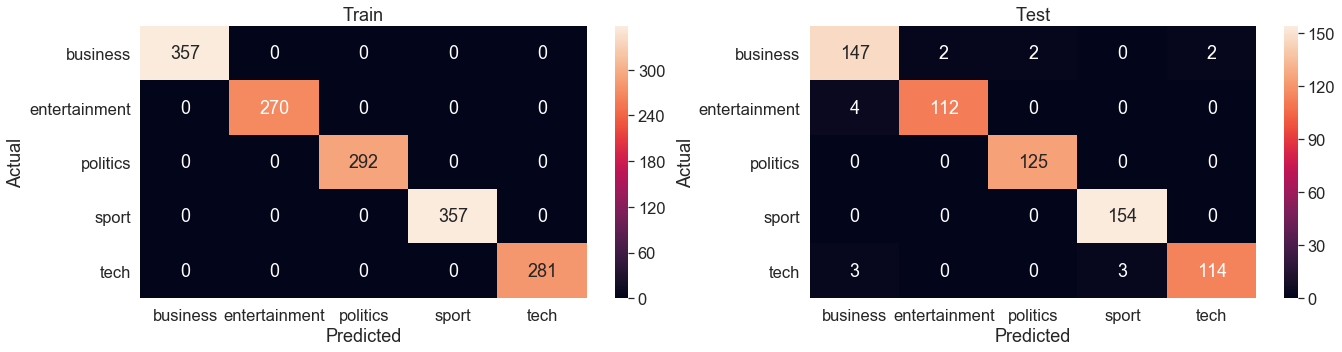

In [40]:
conf_mat(bbc_data,ytrain, ytrain_pred,ytest, ytest_pred)

**Observations:**

- As the previous model,RandomForest model is also able to generalize the test data.
- High F1 score suggest that there is a verygood balance between precision and recall.
- All models are performing verywell on train data and validation/test data.This miight be due to the fact that,
    - There are very few data points available.Which makes our model to overfit on data.This cause high accuraccy on train data.
    - both the train and validation set article belongs to bbc.Hence,the language structure of the articles may be the same.Which cause train and test data to be in similar to nature.And hence,high accuraccy on test data too.
    - To understand the behaviour of the model,we can cross check it with evaluation data collected from other sources.

#### Test on Evaluation dataset-(Data scrapped from sources other than bbc)

##### Load Evaluaton data

- Creating evaluation dataset,with articles collected fromm inshorts.com

In [41]:
eval_data=pd.read_excel(r"C:\Users\DELL\Desktop\A6\news_classification\inshorts_data.xlsx")
eval_data.head()

,Unnamed: 0,title,story,Category
0,0,Pawar writes to PM on COVID-19 impact on Mahar...,NCP chief Sharad Pawar on Saturday wrote to PM...,politics
1,1,Governor's rule imposed in Assam's Bodoland Te...,Governor's rule was imposed in Assam's Bodolan...,politics
2,2,"Sonia writes to PM, suggests 5 steps to help M...",Congress interim chief Sonia Gandhi has writte...,politics
3,3,Don't get revenue just by starting wine shops:...,Shiv Sena took a dig at MNS chief Raj Thackera...,politics
4,4,COVID-19 situation is bad in Agra: Priyanka sh...,Congress leader Priyanka Gandhi Vadra on Sunda...,politics


In [42]:
eval_data.columns

Index(['Unnamed: 0', 'title', 'story', 'Category'], dtype='object')

In [43]:
eval_data.rename({'Category':'category','story':'content'},axis=1,inplace=True)
eval_data=eval_data.iloc[:,eval_data.columns!='Unnamed: 0']
eval_data.head(3)

,title,content,category
0,Pawar writes to PM on COVID-19 impact on Mahar...,NCP chief Sharad Pawar on Saturday wrote to PM...,politics
1,Governor's rule imposed in Assam's Bodoland Te...,Governor's rule was imposed in Assam's Bodolan...,politics
2,"Sonia writes to PM, suggests 5 steps to help M...",Congress interim chief Sonia Gandhi has writte...,politics


In [44]:
eval_data.category.unique()

array(['politics', 'sports', 'technology', 'business', 'entertainment'],
      dtype=object)

In [45]:
eval_data.category[eval_data.category=='technology']='tech'

In [46]:
eval_data.category.unique()

array(['politics', 'sports', 'tech', 'business', 'entertainment'],
      dtype=object)

In [47]:
eval_data.head(3)

,title,content,category
0,Pawar writes to PM on COVID-19 impact on Mahar...,NCP chief Sharad Pawar on Saturday wrote to PM...,politics
1,Governor's rule imposed in Assam's Bodoland Te...,Governor's rule was imposed in Assam's Bodolan...,politics
2,"Sonia writes to PM, suggests 5 steps to help M...",Congress interim chief Sonia Gandhi has writte...,politics


##### Evaluation data overview

In [48]:
eval_data.shape

(123, 3)

In [49]:
eval_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 3 columns):
title       123 non-null object
content     123 non-null object
category    123 non-null object
dtypes: object(3)
memory usage: 3.0+ KB


##### Null value Treatment

In [50]:
eval_data.isna().sum()

title       0
content     0
category    0
dtype: int64

##### Evaluation data basic statistics

In [51]:
eval_data['category'].value_counts()

sports           25
politics         25
business         25
entertainment    24
tech             24
Name: category, dtype: int64

**Observations:**

- All the categories are almost same number of samples.

##### Labeling  Target column

- Labelling target classes with numericals.

In [52]:
#labeling the target variable from hold out dataset
eval_data['category_id']=eval_data['category'].values
eval_data.category_id[eval_data.category_id=='business']=0
eval_data.category_id[eval_data.category_id=='entertainment']=1
eval_data.category_id[eval_data.category_id=='politics']=2
eval_data.category_id[eval_data.category_id=='sports']=3
eval_data.category_id[eval_data.category_id=='tech']=4

In [53]:
eval_data['category_id'].unique()

array([2, 3, 4, 0, 1], dtype=object)

In [54]:
eval_data['category_id']=eval_data['category_id'].astype('int')
eval_data['category_id'].unique()

array([2, 3, 4, 0, 1], dtype=int64)

##### Text Preprocessing

- Normalizing the text features.

###### title

In [55]:
from tqdm import tqdm
clean_titles = []
for title in tqdm(eval_data['title'].values):
    clean_title = clean_text(title)
    clean_titles.append(clean_title)
eval_data['title']=clean_titles

100%|██████████████████████████████████████| 123/123 [00:00<00:00, 1684.14it/s]


###### content

In [56]:
from tqdm import tqdm
clean_contents = []
for content in tqdm(eval_data['content'].values):
    clean_content = clean_text(content)
    clean_contents.append(clean_content)
eval_data['content']=clean_contents

100%|██████████████████████████████████████| 123/123 [00:00<00:00, 1950.99it/s]


##### Vectorization

###### title

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(ngram_range=(1,2),min_df=3)
tf.fit(xtrain['title'].values)
title_evaltf=tf.transform(eval_data['title'].values)
print("Data after vectorization")
print(f"Test data-:{title_evaltf.shape}")

Data after vectorization
Test data-:(123, 722)


###### content

In [58]:
tf=TfidfVectorizer(ngram_range=(1,2),min_df=5)
tf.fit(xtrain['content'].values)
content_evaltf=tf.transform(eval_data['content'].values)
print("Data after vectorization")
print(f"Test data-:{content_evaltf.shape}")

Data after vectorization
Test data-:(123, 11359)


##### Prepare Evaluation Data Matrix

In [59]:
evaluation=hstack((title_evaltf,content_evaltf)).tocsr()
yeval=eval_data['category_id']
print("Data")
print(f"Evaluation data features-:{evaluation.shape},Evaluation data target-:{yeval.shape}")

Data
Evaluation data features-:(123, 12081),Evaluation data target-:(123,)


##### Random Forest_Evaluation data

In [60]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
ovr_rf=OneVsRestClassifier(rf)
ovr_rf.fit(train,ytrain)
ytrain_pred=ovr_rf.predict(train)
yeval_pred=ovr_rf.predict(evaluation)
print('business:0,entertainment:1,politics:2,sport:3,tech:4')
print('-------------------------------------------------------------------------')
print('Train report')
print(classification_report(ytrain,ytrain_pred))
print("-------------------------------------------------------------------------")
print('Test report')
print(classification_report(yeval,yeval_pred))

business:0,entertainment:1,politics:2,sport:3,tech:4
-------------------------------------------------------------------------
Train report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       357
           1       1.00      1.00      1.00       270
           2       1.00      1.00      1.00       292
           3       1.00      1.00      1.00       357
           4       1.00      1.00      1.00       281

    accuracy                           1.00      1557
   macro avg       1.00      1.00      1.00      1557
weighted avg       1.00      1.00      1.00      1557

-------------------------------------------------------------------------
Test report
              precision    recall  f1-score   support

           0       0.58      0.88      0.70        25
           1       0.77      0.96      0.85        24
           2       1.00      0.60      0.75        25
           3       0.85      0.92      0.88        25
           4  

**Observations:**

- RandomForest base model is providing 100%percent accuraccy and F1score for train ,but 76% for evaluation data.
- Clearly the model is overfiited.
- Low precision of 0.58 for business suggests that,among the predicted articles to be of business category only 58%are true.
- Low recall of 0.46 for tech suggests that,among the actual tech related arcticles the model was able to identify only 46%.
- Among the actual politics related articles the model was able to identify only 60% correctly.
- The model is not able to perform well on business,tech and politics categories.

### Advanced Feature Engineering

- As the title itself contains a lot of information in it,giving more weightage to words in title.

#### Adding more weightage to title

In [61]:
xtrain['new_title']=xtrain['title'].apply(lambda x:x*3)
eval_data['new_title']=eval_data['title'].apply(lambda x:x*3)

### Random Forest_Evaluation Data with weighted title

#### vectorization

##### title

In [62]:
tf=TfidfVectorizer(ngram_range=(1,2),min_df=3)
tf.fit(xtrain['new_title'].values)
newtitle_trtf=tf.transform(xtrain['new_title'].values)
newtitle_evaltf=tf.transform(eval_data['new_title'].values)
print("Data after vectorization")
print(f"Train data-:{newtitle_trtf.shape}")
print(f"Test data-:{newtitle_evaltf.shape}")

Data after vectorization
Train data-:(1557, 724)
Test data-:(123, 724)


#### Data Model

In [63]:
train_1=hstack((newtitle_trtf,content_trtf)).tocsr()
evaluation_1=hstack((newtitle_evaltf,content_evaltf)).tocsr()
print("Data")
print(f"Train data features-:{train_1.shape},Train data target-:{ytrain.shape}")
print(f"Evaluation data features-:{evaluation_1.shape},Evaluation data target-:{yeval.shape}")

Data
Train data features-:(1557, 12083),Train data target-:(1557,)
Evaluation data features-:(123, 12083),Evaluation data target-:(123,)


In [64]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
ovr_rf=OneVsRestClassifier(rf)
ovr_rf.fit(train_1,ytrain)
ytrain_pred=ovr_rf.predict(train_1)
yeval_pred=ovr_rf.predict(evaluation_1)
print('business:0,entertainment:1,politics:2,sport:3,tech:4')
print('-------------------------------------------------------------------------')
print('Train report')
print(classification_report(ytrain,ytrain_pred))
print("-------------------------------------------------------------------------")
print('Test report')
print(classification_report(yeval,yeval_pred))

business:0,entertainment:1,politics:2,sport:3,tech:4
-------------------------------------------------------------------------
Train report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       357
           1       1.00      1.00      1.00       270
           2       1.00      1.00      1.00       292
           3       1.00      1.00      1.00       357
           4       1.00      1.00      1.00       281

    accuracy                           1.00      1557
   macro avg       1.00      1.00      1.00      1557
weighted avg       1.00      1.00      1.00      1557

-------------------------------------------------------------------------
Test report
              precision    recall  f1-score   support

           0       0.60      0.84      0.70        25
           1       0.82      0.96      0.88        24
           2       1.00      0.56      0.72        25
           3       0.82      0.92      0.87        25
           4  

**Observations:**

- High accuraccy of 100% for train and low accuraccy of 77% for evaluation data suggests that the model is overfitted one.
- The model fails to identify articles related to business,tech and politics.

### Select k best features 

- Selecting best 6000 features based on chi2 values.

#### Selecting  best 6000 features

In [65]:
from sklearn.feature_selection import SelectKBest, chi2
kbest=SelectKBest(chi2, k=6000)
kbest.fit(train_1, ytrain)
train_new=kbest.transform(train_1)
evaluation_new=kbest.transform(evaluation_1)
print(train_new.shape)
print(evaluation_new.shape)

(1557, 6000)
(123, 6000)


#### Random forest+select k best+base model

In [66]:
rf=RandomForestClassifier()
ovr_rf=OneVsRestClassifier(rf)
ovr_rf.fit(train_new,ytrain)
ytrain_pred=ovr_rf.predict(train_new)
yeval_pred=ovr_rf.predict(evaluation_new)
print('business:0,entertainment:1,politics:2,sport:3,tech:4')
print('-------------------------------------------------------------------------')
print('Train report')
print(classification_report(ytrain,ytrain_pred))
print("-------------------------------------------------------------------------")
print('Test report')
print(classification_report(yeval,yeval_pred))

business:0,entertainment:1,politics:2,sport:3,tech:4
-------------------------------------------------------------------------
Train report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       357
           1       1.00      1.00      1.00       270
           2       1.00      1.00      1.00       292
           3       1.00      1.00      1.00       357
           4       1.00      1.00      1.00       281

    accuracy                           1.00      1557
   macro avg       1.00      1.00      1.00      1557
weighted avg       1.00      1.00      1.00      1557

-------------------------------------------------------------------------
Test report
              precision    recall  f1-score   support

           0       0.62      0.80      0.70        25
           1       0.81      0.92      0.86        24
           2       1.00      0.68      0.81        25
           3       0.79      0.92      0.85        25
           4  

#### Logistic Regression+select k best+base model

In [67]:
lgr=LogisticRegression()
ovr=OneVsRestClassifier(lgr)
ovr.fit(train_new,ytrain)
ytrain_pred=ovr.predict(train_new)
ytest_pred=ovr.predict(evaluation_new)
print('business:0,entertainment:1,politics:2,sport:3,tech:4')
print('-------------------------------------------------------------------------')
print('Train report')
print(classification_report(ytrain,ytrain_pred))
print("-------------------------------------------------------------------------")
print('Test report')
print(classification_report(yeval,yeval_pred))

business:0,entertainment:1,politics:2,sport:3,tech:4
-------------------------------------------------------------------------
Train report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       357
           1       1.00      0.99      0.99       270
           2       0.99      1.00      0.99       292
           3       1.00      1.00      1.00       357
           4       1.00      0.99      0.99       281

    accuracy                           0.99      1557
   macro avg       0.99      0.99      0.99      1557
weighted avg       0.99      0.99      0.99      1557

-------------------------------------------------------------------------
Test report
              precision    recall  f1-score   support

           0       0.62      0.80      0.70        25
           1       0.81      0.92      0.86        24
           2       1.00      0.68      0.81        25
           3       0.79      0.92      0.85        25
           4  

#### SVM+select k best+base model

In [68]:
sm=LinearSVC(loss='squared_hinge')
ovr_svm=OneVsRestClassifier(sm)
ovr_svm.fit(train_new,ytrain)
ytrain_pred=ovr_svm.predict(train_new)
ytest_pred=ovr_svm.predict(evaluation_new)
print('business:0,entertainment:1,politics:2,sport:3,tech:4')
print('-------------------------------------------------------------------------')
print('Train report')
print(classification_report(ytrain,ytrain_pred))
print("-------------------------------------------------------------------------")
print('Test report')
print(classification_report(yeval,yeval_pred))

business:0,entertainment:1,politics:2,sport:3,tech:4
-------------------------------------------------------------------------
Train report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       357
           1       1.00      1.00      1.00       270
           2       1.00      1.00      1.00       292
           3       1.00      1.00      1.00       357
           4       1.00      1.00      1.00       281

    accuracy                           1.00      1557
   macro avg       1.00      1.00      1.00      1557
weighted avg       1.00      1.00      1.00      1557

-------------------------------------------------------------------------
Test report
              precision    recall  f1-score   support

           0       0.62      0.80      0.70        25
           1       0.81      0.92      0.86        24
           2       1.00      0.68      0.81        25
           3       0.79      0.92      0.85        25
           4  

- After selecting best 6000 features,performance of model on tech articles is improved.
- The F1_score for tceh articles are improved from 2% 82%,while maintainig precision of 100%.
- Still the performance on political articles are low with 67%.
- The overall performance of model is improved from f1score of 76% for evaluation data to 78%.
- Logistic Regression with best 6000 features is selected as the best model.

## Summary & Conclusion

- We created train and validation data with articles from bbc.
- Extracted title from articles and added as a new feature.
- Treated the text features for htmls,urls,contracted words,stop words etc.
- Tested the model performance on train and validation data.
- Its been identified that the model is performing well on both train and validation data with accuraccy & F1_score of 100% on train 
  and 97%on test.
- Upon further analysis,its been understood that the high performance is due to facts that,
    - There are very few data points available.Which makes our model to overfit on data.This cause high accuraccy on train data.
    - both the train and validation set article belongs to bbc.Hence,the language structure of the articles may be the same.Which cause train and test data to be in similar to nature.And hence,high accuraccy on test data too.
- For forther evaluation,we webscrapped inshorts.com ,collected the articles from 5differrent categories and created an evaluation dataset.
- On evaluation dataset,model is giving high F1_Score of 100% on train and 76% on evaluation data.Which suggestec the model is overfitting.
- The model as not able to perform well with articles related to business and tech.
- To tackle overfittingwe gave more weightage to tile.Because,title itself contains lot of information.
- Selected best 6000 features using chi2 metric.
- On selected 6000 features,the model performance improved,eventhough that is not a substantial improvement.
- The model performace improved from 76% to 78% f1_score.
- The models ability to identify tech articles improved.
- The model performnce can be improved by increasing training records/samples.
- Training the model with articles from differrent sources can increase its ability to generalize on unseen data.
- Selecting best 6000 features can reduce the impact of overfitting.
- We perfomed model validation and evaluation with logistic regression,SVM and Random forest and OneVsRest approach.
 All three algorithms provided similar results.
- Logistic Regression with best 6000 features are selected for creating Document classifiaction application.
- Tkinter is selected to develop the front end.